# Outstanding Project 2

# submission by Rajarshi Guchhait(rajarshiguchhait1505@gmail.com)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

In [2]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [3]:
from keras.utils.np_utils import to_categorical

In [4]:
import matplotlib.pyplot as plt

In [5]:
(train_features,train_target),(test_features,test_target)=tf.keras.datasets.mnist.load_data()

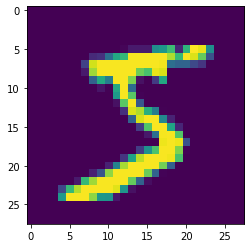

In [6]:
plt.imshow(train_features[0])

In [7]:
train_features.shape

(60000, 28, 28)

In [8]:
test_features.shape

(10000, 28, 28)

In [9]:
train_features=train_features.reshape(train_features.shape[0],28,28,1)
test_features=test_features.reshape(test_features.shape[0],28,28,1)

In [10]:
# NORMALIZATION
train_features=train_features/255
test_features=test_features/255

In [12]:
# ONE-HOT ENCODING
train_target=to_categorical(train_target)
test_target=to_categorical(test_target)

In [13]:
train_target.shape

(60000, 10)

In [14]:
test_target.shape

(10000, 10)

In [15]:
train_features.shape

(60000, 28, 28, 1)

In [16]:
test_features.shape

(10000, 28, 28, 1)

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [19]:
dataGen.fit(train_features)

# BUILDING THE MODEL

In [20]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1)) # for overfitting model (REGULARIZATION)
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

# COMPILING THE MODEL

In [21]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# FITTING THE MODEL

In [23]:
model.fit(dataGen.flow(train_features,train_target,batch_size=150),epochs=5)

Epoch 1/5
400/400 [==============================] - 39s 60ms/step - loss: 0.7947 - accuracy: 0.7525
Epoch 2/5
400/400 [==============================] - 26s 64ms/step - loss: 0.1772 - accuracy: 0.9463
Epoch 3/5
400/400 [==============================] - 28s 71ms/step - loss: 0.1353 - accuracy: 0.9589
Epoch 4/5
400/400 [==============================] - 25s 63ms/step - loss: 0.1061 - accuracy: 0.9672
Epoch 5/5
400/400 [==============================] - 25s 63ms/step - loss: 0.0902 - accuracy: 0.9726


# EVALUATING THE MODEL

In [25]:
predictions=model.predict(test_features)

In [33]:
print("Prediction     Actual     Remark")
print("----------     ------     ------")
correct=0
wrong=0
for index in range(10000):
    pred=np.argmax(predictions[index])
    actual=np.argmax(test_target[index])
    if(pred==actual):
        remark="CORRECT"
        correct=correct+1
    else:
        remark="<INCORRECT> <<<<<<<<<"
        wrong=wrong+1
    print(str(pred)+"              "+str(actual)+"          "+remark)

score=(correct*100)/10000 # since the test_features.shape tells us that we have a testing set of 10000 images
print("\n------------------------------------------------------\n")
print("No. of correct predictions = "+ str(correct) + " out of 10000")
print("No. of incorrect predictions = "+ str(wrong) + " out of 10000")
print("ACCURACY SCORE = "+str(score)+"%")   

Prediction     Actual     Remark
----------     ------     ------
7              7          CORRECT
2              2          CORRECT
1              1          CORRECT
0              0          CORRECT
4              4          CORRECT
1              1          CORRECT
4              4          CORRECT
9              9          CORRECT
5              5          CORRECT
9              9          CORRECT
0              0          CORRECT
6              6          CORRECT
9              9          CORRECT
0              0          CORRECT
1              1          CORRECT
5              5          CORRECT
9              9          CORRECT
7              7          CORRECT
3              3          CORRECT
4              4          CORRECT
9              9          CORRECT
6              6          CORRECT
6              6          CORRECT
5              5          CORRECT
4              4          CORRECT
0              0          CORRECT
7              7          CORRECT
4              4

0              0          CORRECT
6              6          CORRECT
1              1          CORRECT
5              5          CORRECT
5              5          CORRECT
8              8          CORRECT
3              3          CORRECT
8              8          CORRECT
2              2          CORRECT
6              6          CORRECT
5              5          CORRECT
0              0          CORRECT
7              7          CORRECT
4              4          CORRECT
6              6          CORRECT
1              1          CORRECT
3              3          CORRECT
4              4          CORRECT
7              7          CORRECT
3              3          CORRECT
2              2          CORRECT
3              3          CORRECT
4              4          CORRECT
2              2          CORRECT
5              5          CORRECT
2              2          CORRECT
7              7          CORRECT
1              1          CORRECT
7              7          CORRECT
2             

3              3          CORRECT
0              0          CORRECT
2              2          CORRECT
8              8          CORRECT
5              5          CORRECT
9              9          CORRECT
6              6          CORRECT
9              9          CORRECT
7              7          CORRECT
2              2          CORRECT
1              1          CORRECT
3              3          CORRECT
6              6          CORRECT
4              4          CORRECT
1              1          CORRECT
8              8          CORRECT
2              2          CORRECT
4              4          CORRECT
0              0          CORRECT
5              5          CORRECT
1              1          CORRECT
0              0          CORRECT
2              2          CORRECT
2              2          CORRECT
6              6          CORRECT
4              4          CORRECT
4              4          CORRECT
3              3          CORRECT
9              9          CORRECT
6             

1              1          CORRECT
2              2          CORRECT
8              8          CORRECT
9              9          CORRECT
1              1          CORRECT
8              8          CORRECT
8              8          CORRECT
7              7          CORRECT
8              8          CORRECT
1              1          CORRECT
0              0          CORRECT
0              0          CORRECT
2              7          <INCORRECT> <<<<<<<<<
7              7          CORRECT
8              8          CORRECT
7              7          CORRECT
5              5          CORRECT
0              0          CORRECT
6              6          CORRECT
1              1          CORRECT
5              5          CORRECT
7              7          CORRECT
4              4          CORRECT
6              6          CORRECT
1              1          CORRECT
2              2          CORRECT
5              5          CORRECT
0              0          CORRECT
7              7          CORRECT


0              0          CORRECT
2              2          CORRECT
9              9          CORRECT
4              4          CORRECT
9              9          CORRECT
7              7          CORRECT
0              0          CORRECT
2              2          CORRECT
7              7          CORRECT
4              4          CORRECT
9              9          CORRECT
9              9          CORRECT
2              2          CORRECT
5              5          CORRECT
9              9          CORRECT
8              8          CORRECT
3              3          CORRECT
8              8          CORRECT
6              6          CORRECT
7              7          CORRECT
0              0          CORRECT
0              0          CORRECT
1              1          CORRECT
2              2          CORRECT
3              3          CORRECT
4              4          CORRECT
5              5          CORRECT
6              6          CORRECT
7              7          CORRECT
8             

0              0          CORRECT
1              1          CORRECT
2              2          CORRECT
4              4          CORRECT
5              5          CORRECT
6              6          CORRECT
7              7          CORRECT
8              8          CORRECT
9              9          CORRECT
0              0          CORRECT
1              1          CORRECT
3              3          CORRECT
4              4          CORRECT
5              5          CORRECT
6              6          CORRECT
7              7          CORRECT
8              8          CORRECT
0              0          CORRECT
1              1          CORRECT
3              3          CORRECT
4              4          CORRECT
7              7          CORRECT
8              8          CORRECT
9              9          CORRECT
7              7          CORRECT
5              5          CORRECT
5              5          CORRECT
1              1          CORRECT
9              9          CORRECT
9             